# **🧁 Recipe Site Traffic**


❗**You can find my presentation of this project  (video + powerpoint )** [here](https://vimeo.com/manage/videos/811731898) **.** It is a **non-technical presentation** for the Product Manager from Tasty Bytes who requested this analysis.


## **1. 📖 Introduction**
**Tasty Bytes** was founded in 2020 in the midst of the Covid Pandemic. It started as a search engine for recipes, helping
people to find ways to use up the limited supplies they had at home.
Now, over two years on, they are a fully fledged business. 

![recipe_image](recipe_image.jpeg)


## **2. 🎯 Goals for this project**
At the moment, the team choose their favorite recipe from a selection and display that on the home
page. They have noticed that traffic to the rest of the website goes up by as much as 40% if they
pick a popular recipe, but they don’t know how to decide if a recipe will be popular. More traffic
means more subscriptions so this is really important to the company.

The product manager from Tasty Bytes specifically requested to:

🟢 Predict which recipes will lead to high traffic.

🟢 Correctly predict high traffic recipes 80% of the time.


## **3. 💾 The dataset** 
The product manager from TastyBytes provided data for each recipe,
as well as whether there was high traffic when the recipe was featured on the home page.

The dataset contains:

- `recipe`: Numeric, unique identifier of recipe
- `calories`: Numeric, number of calories
- `carbohydrate`: Numeric, amount of carbohydrates in grams
- `sugar`: Numeric, amount of sugar in grams
- `protein`: Numeric, amount of protein in grams
- `category`: Character, type of recipe. Recipes are listed in one of ten possible groupings:
  - *Lunch/Snacks*, 
  - *Beverages*, 
  - *Potato*,
  - *Vegetable*, 
  - *Meat*, 
  - *Chicken*, 
  - *Pork*, 
  - *Dessert*, 
  - *Breakfast*, 
  - *One Dish Meal*
- `servings`: Numeric, number of servings for the recipe
- `high_traffic`: Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”.

## **4. 🚀Analysis plan**
✅In the first step, we perfomed an Exploratory Data Analysis to uncover any valueble insights related to:
  - The interactions between the recipe characteristics.
  - The interactions between all the characteristics of the recipe and the high traffic generated on the site when a particular recipe is displayed;

✅ Next, we also conducted statistical significance tests to explore the relationship between the variables:
  - First, we performed target-feature tests to determine whether there is a connection between the target feature, *high_traffic*, and the other recipe features.
  - Second, we performed feature-feature tests to assess any relationships between the features themselves.

✅ We then put the two candidate models through a series of steps to fit and evaluate them, including:

- We split the dataset into training and testing sets (80:20 ratio), stratifying by the class proportions of the target variable.

- The categorical variable was encoding using one-hot technique, and, where necessary, all the input features were standardised by having a mean of 0 and standard deviation of 1.

- We trained the two machine learning algorithms for this classification problem.

- We measured the models performances using the accuracy, recall and precision.

- We tuned the hyperparameters for the Gradient Boosting model using 5-fold stratified cross-validation.

- Finally, we assesed feature importances and made a final selection of the features.

The classifiers used are:
- Logistic Regression
- Gradient Boosting

✅ After this analysis, we provided some recommendations on how to increase the traffic on this site based on our results.



## **📚 5. Install packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

from scipy.stats import shapiro, chi2_contingency, mannwhitneyu


## **6. 📕 Read the dataset**
The dataset contains information that is categorized into **8 variables** for a total of **947 recipes**.

In [2]:
recipes = pd.read_csv(r'./recipe_site_traffic_2212.csv')
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
recipes.shape

(947, 8)

## **7. 🧹 Data cleaning and validation**
In this step, we examined, validated and cleaned each column in the data.
We performed the following tasks:

1. Checked for any missing values in the columns and either eliminated or replaced as necessary;
2. Checked the data types for each variable and changed them as necessary;
3. Checked if the dataset had negative values for numeric columns and eliminated them;
4. Checked for duplicates;
5. Checked for categorical data problems: Can we find any inconsistencies in the values of the *category* column?

### **7.1. Missing values**
We observed that there were **52** missing values in the columns `calories`, `carbohydrate`, `sugar` and` protein`. After using the *missingno* library for visualizing the missing values, we could see that in almost all cases, the null values were present in all the four columns for a particular recipe. We decided to eliminate these null values from the dataset since they represented a small percentage of the total of 947 recipes.

We have noticed **373** null values for the `high_traffic` column. According to the dataset description, the *High* label is assigned to recipes that received high traffic when shown on the site. Therefore, we can assume that any recipe without the *High* label had low traffic, and we will replace the null values with the label *Low*. 

After cleaning and validating data, the dataset contains **895** recipes.

In [4]:
# how many missing values are in the dataset?
recipes.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

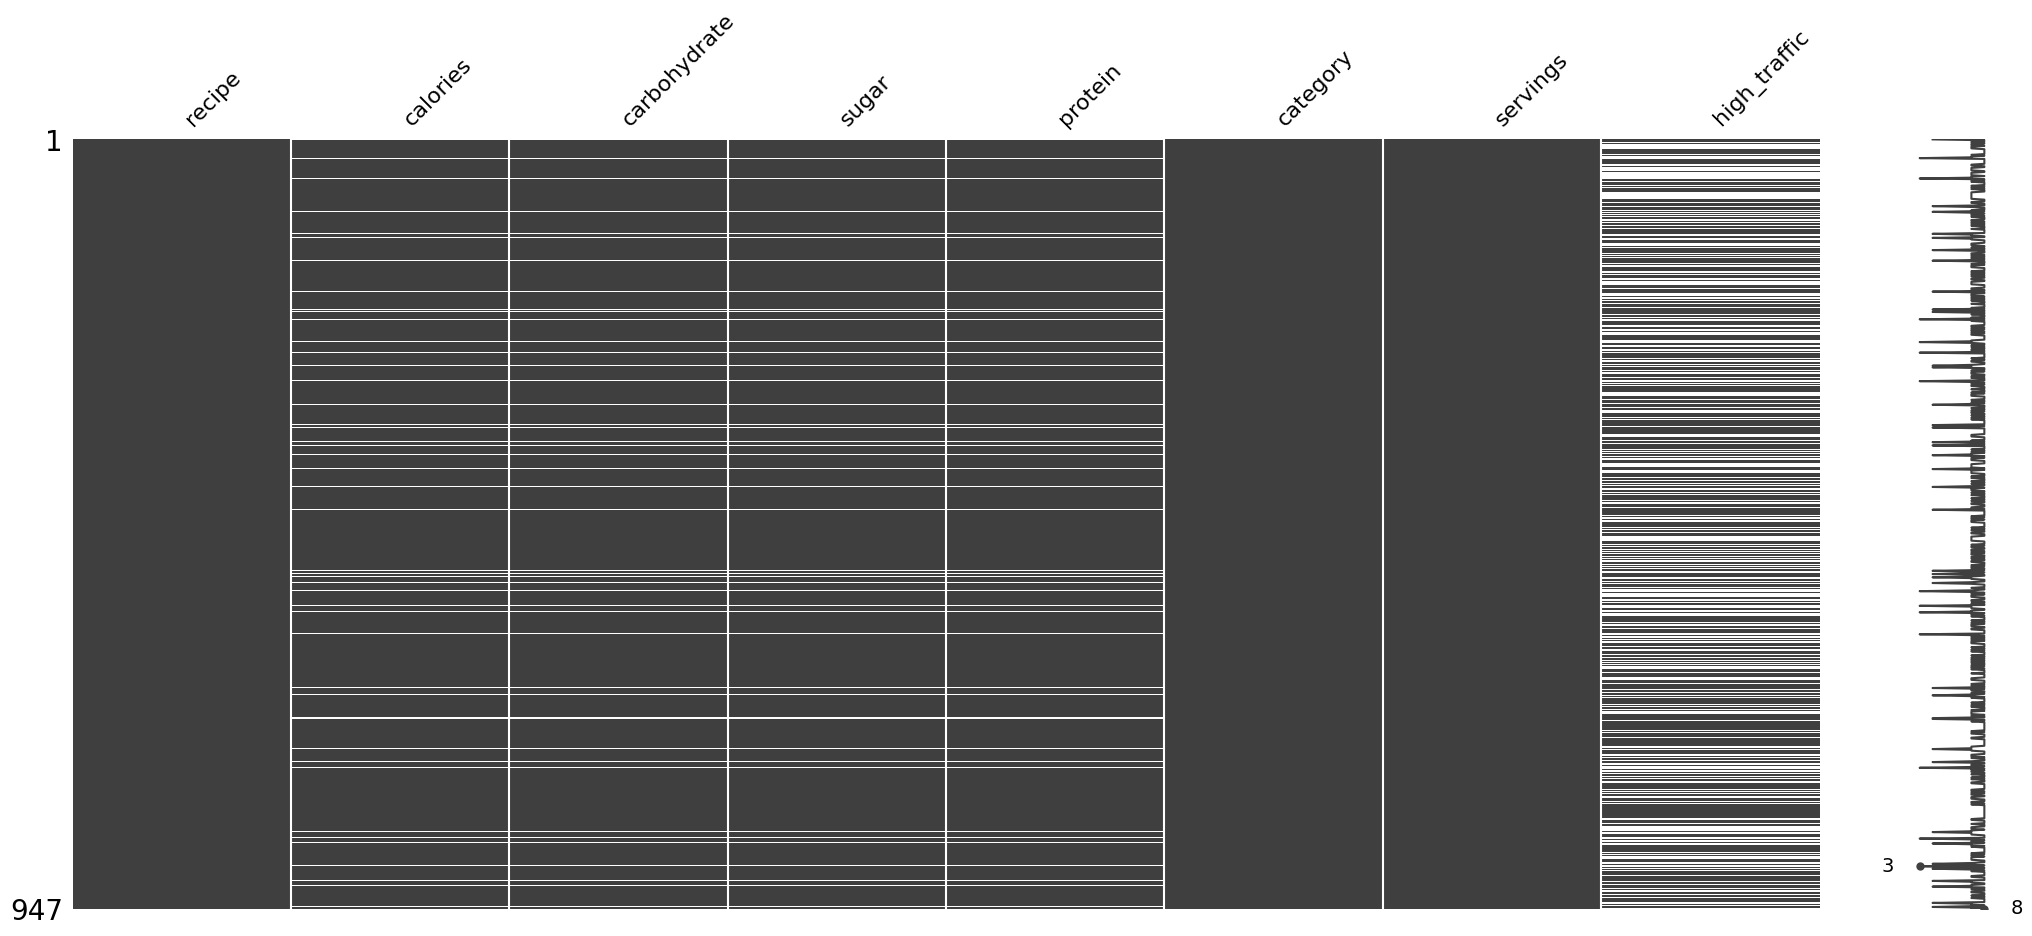

In [5]:
# using missingno for visualizing the missing values
msno.matrix(recipes)
plt.show()

In [6]:
# drop the rows with missing values in 'calories', 'carbohydrate', 'sugar', 'protein' columns
recipes.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'], inplace=True)

In [7]:
# for the column high_traffic, replace the missing values with 'Low'
recipes['high_traffic'].fillna(value='Low', inplace=True)

recipes['high_traffic'].value_counts(normalize=True)

High    0.597765
Low     0.402235
Name: high_traffic, dtype: float64

In [8]:
# verify the changes
recipes.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

❗ `high_traffic` is the target variable and we can see the *High* class is **1.5** times larger that the *Low* class, which means that the dataset is imbalanced. 

❗ To address the imbalanced distribution of `high_traffic` categories, which is approximately **40%** *Low* and **60%** *High*, the class weights were adjusted in a way that they were inversely proportional to the frequencies of each class in the input data. This was done for Logistic Regression algorithm.

## **7.2 Checking the data types**
When reviewing the data types, it was observed that the `servings` column needed to be converted from *object* to *integer* type, whereas the `category` and `high_traffic` columns should be converted to *categorical* type.

On the other hand, the `servings` column contained two values, '4 as a snack' and '6 as a snack', which could not be converted to integers. Therefore, we replaced '4 as a snack' with 4 and '6 as a snack' with 6.  

In [9]:
# check the datatypes for each variable
recipes.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [10]:
# what are the values for the servings column?
recipes['servings'].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [11]:
# replace '4 as a snack' with 4 and '6 as a snack' with 6
recipes['servings'].replace({'4 as a snack': 4, 
                             '6 as a snack': 6},
                            inplace=True)

# convert the servings column to integer type
recipes['servings'] = recipes['servings'].astype(int)

# check if the modifications were applied successfully
assert recipes['servings'].dtype == 'int64'

In [12]:
# convert the 'category' and 'high_traffic' columns to 'category' type
cat_vars = ['category', 'high_traffic']
recipes[cat_vars] = recipes[cat_vars].apply(lambda x: x.astype('category'))


# check if the modifications were applied successfully
assert recipes['category'].dtype == 'category'
assert recipes['high_traffic'].dtype == 'category'

## **7.3 Check for negative values**
The `protein`, `calories`, `carbohydrate`, and `sugar` columns should only contain positive values as they are numeric variables.

After this examination, it resulted that all these variables don't have negative values.


In [13]:
# check if the numeric variables have negative values
num_vars = ['protein', 'calories', 'carbohydrate', 'sugar']
for var in num_vars:
  if recipes[var].min() < 0:
    print(f'Variable {var} contains negative values')

## **7.4 Check for duplicates**
We found out that we don't have any duplicates in our dataset.

In [14]:
# Are any duplicates in our dataset?
recipes.duplicated().sum()

0

## **7.5 Check for categorical data problems**
For the `category` column, are there any inconsistencies?

Eg: 'Lunch' - 'Launch'

We found out that the category column doesn't contain any inconsistencies.

In [15]:
recipes['category'].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

In [16]:
recipes.shape

(895, 8)

After cleaning and validating data, the dataset contains 895 recipes.

## **8. 📈 Exploratory Data Analysis**

### 8.1 The distribution of nutritional features: calories, protein, sugar and carbohydrate variables
To visualize the distribution of these features, histograms will be utilized. In addition, boxplots will be used for each variable to better identify outliers.

Because we have many outliers for each column, we will also use a scatterplot of the variables in question so as for each recipe we will plot the nutritional features and we will highlight the outliers in a different color. This can help us identify any patterns or reasons for the outliers, such as data entry errors, measurement errors, or extreme values that may be legitimate byt are affecting the overall distribution.

In [17]:
def identify_outliers(df):
  '''
  Takes a pandas DataFrame as input and identifies outliers for the numerical 
  variables (calories, carbohydrate, sugar, protein) by using the interquartile 
  range (IQR) method. Creates new columns for each variable to indicate whether
  a data point is an outlier or not, and returns the modified DataFrame with the 
  new columns.
  '''
  num_vars = ['calories', 'carbohydrate', 'sugar', 'protein']
    
  for col in num_vars:
    # calculate the IQR for the "calories" column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers as 1.5 times the IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # identify the outliers using the IQR
    # Create new columns of outliers for each of the variable
    new_col = col + '_outlier'
    df[new_col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), True, False)

  # remove the outliers from the "calories" column
  return df

# use the function identify_outliers
recipes2 = identify_outliers(recipes)

# count the number of outliers for each nutritional column
outliers_cols = ['calories_outlier', 'carbohydrate_outlier', 'sugar_outlier', 'protein_outlier']
recipes2[outliers_cols].sum()

calories_outlier        47
carbohydrate_outlier    58
sugar_outlier           79
protein_outlier         77
dtype: int64

We have **47** outliers in the `calories` column, **58** outliers in the `carbohydrate` column, **79** outliers in the `sugar` column and **77** outliers in the `protein` column.

In [18]:
# defining the color palettes for the plots
palette = ['#7E1037', '#F55C7A', '#F57C73', '#FFBABA', '#F68C70', '#F6AC69',
          '#F6BC66', "#C89566", '#927071', '#A5888A', '#DAA095', '#D49BA7']

palette2 = ['#7E1037', '#F55C7A']

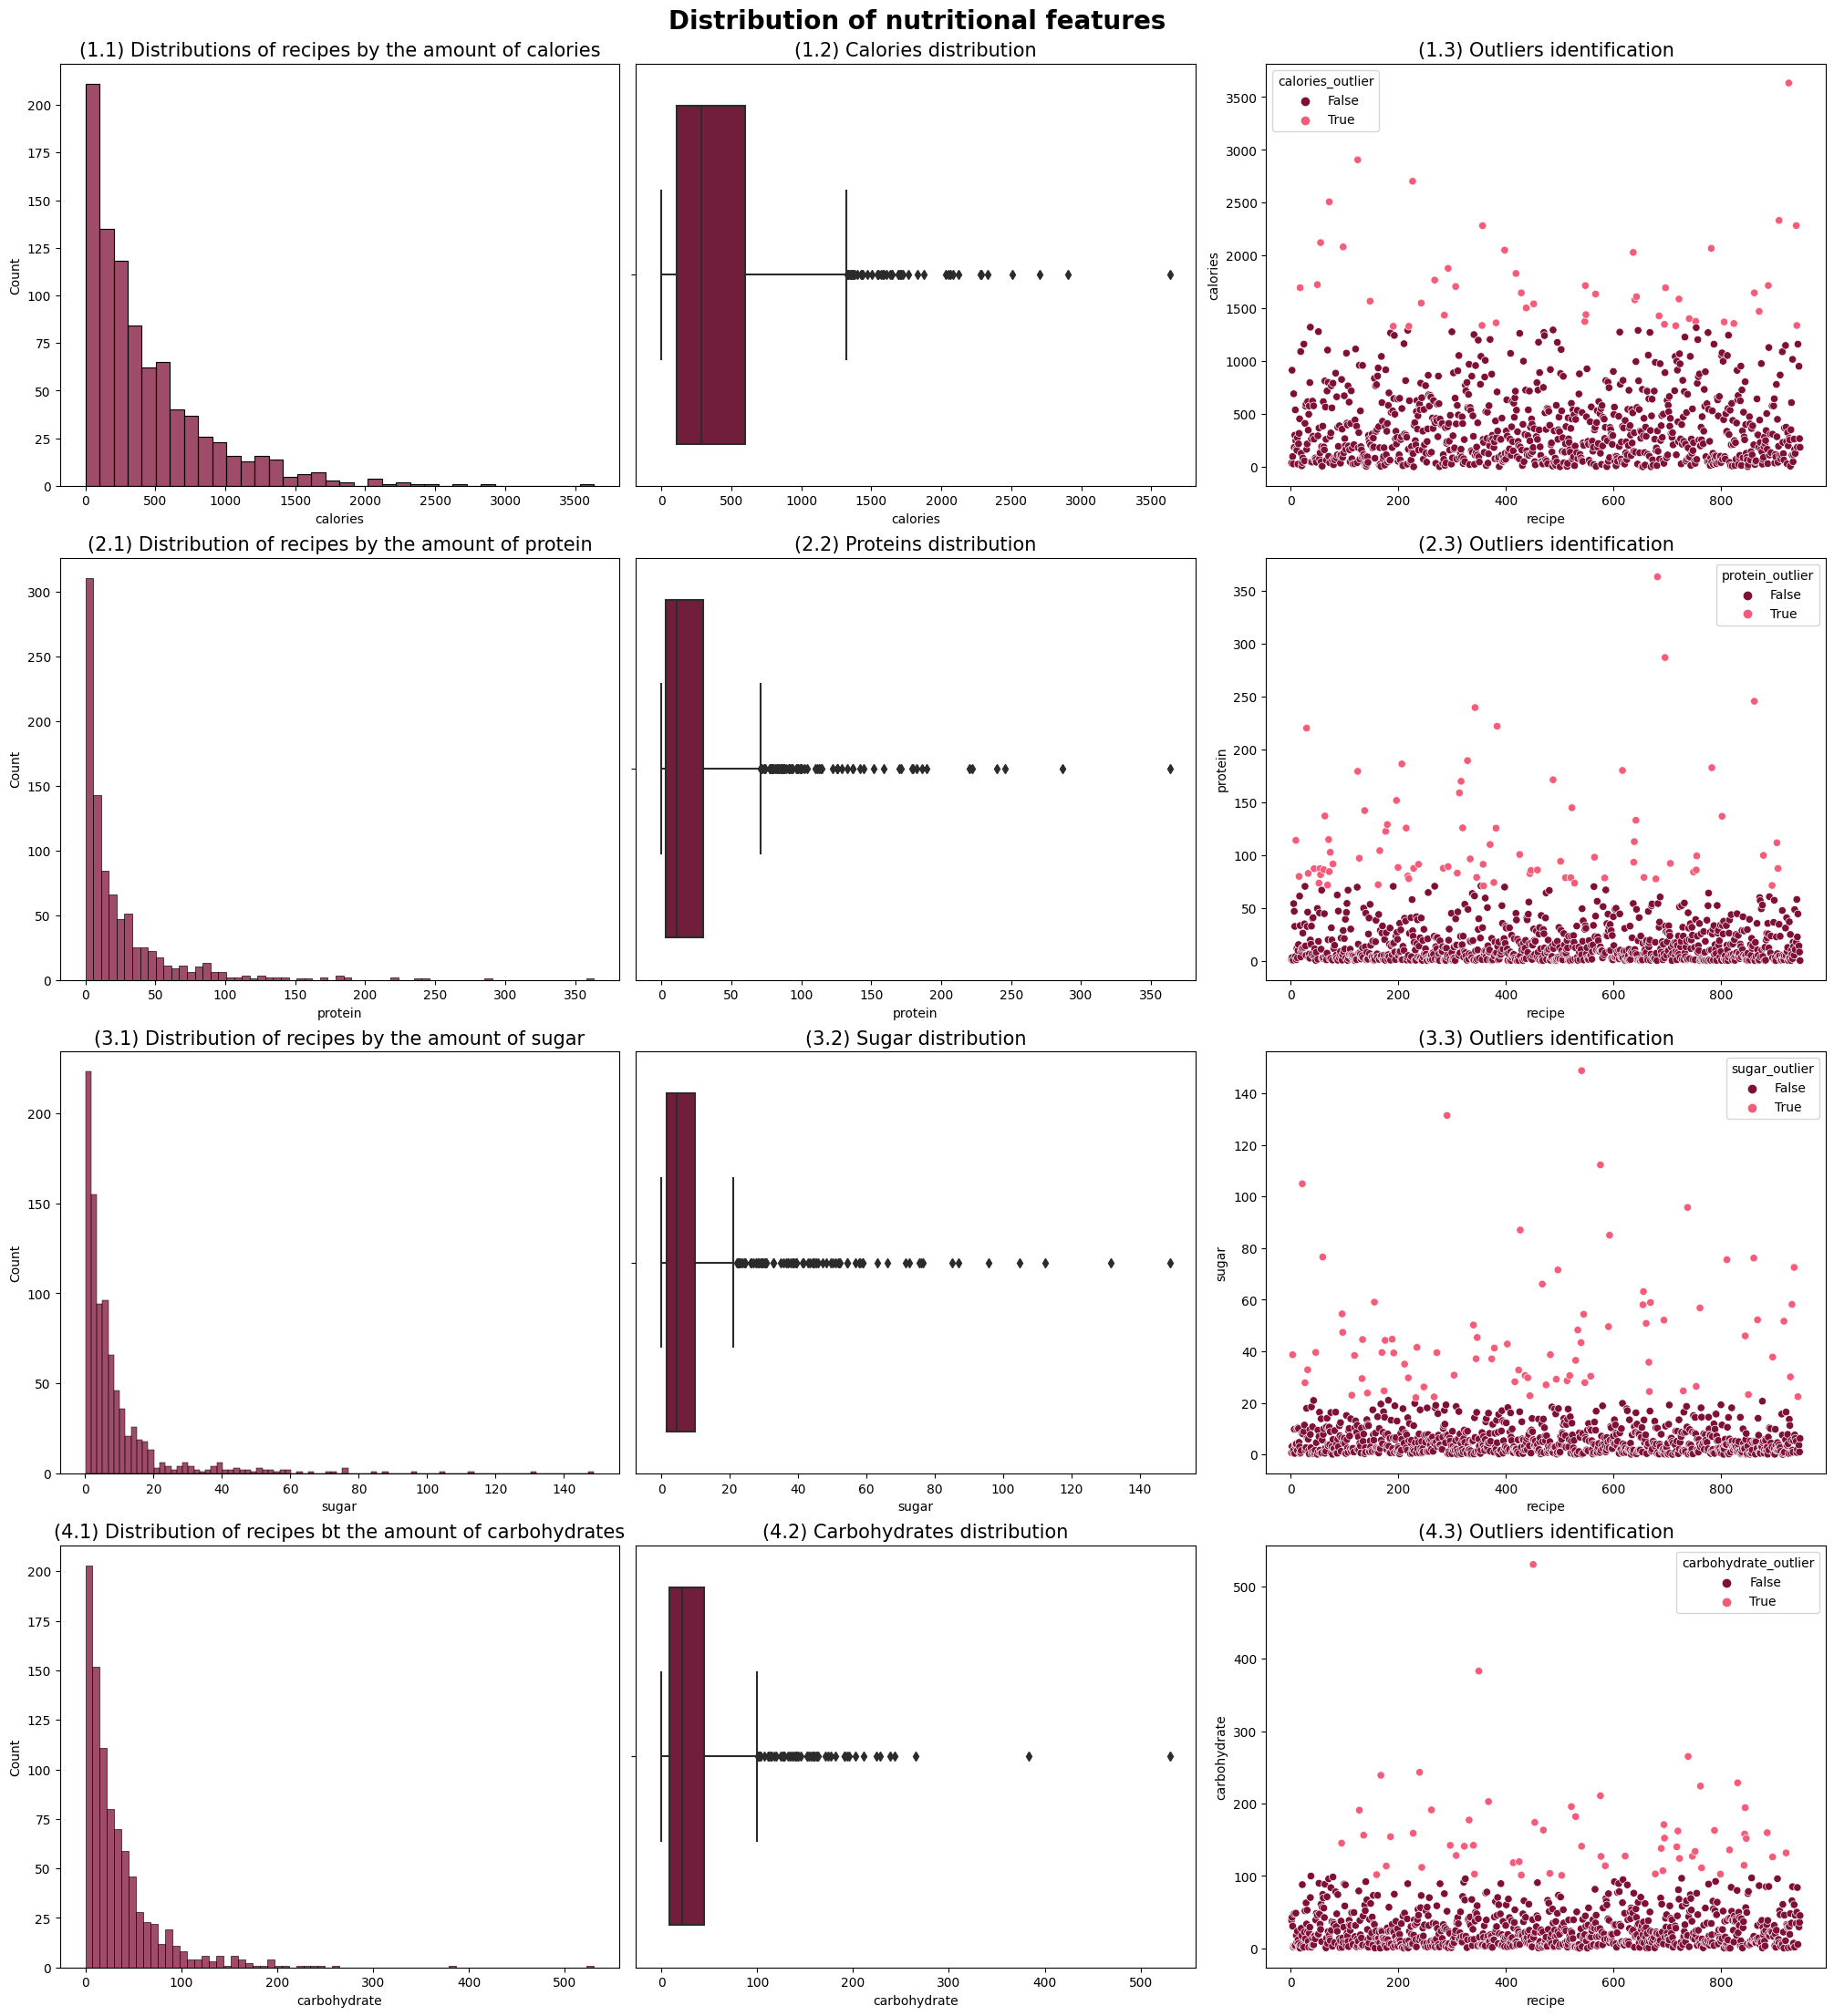

In [19]:
# plot the distributions of the nutritional characteristics of the recipes as
# well as the outliers using histograms, boxplots and scatterplots

fig = plt.figure(figsize=(20, 22), constrained_layout=True)
spec = fig.add_gridspec(4, 3)

# calories
ax00 = fig.add_subplot(spec[0, 0])
sns.histplot(recipes['calories'], color='#7E1037', ax=ax00)
ax00.set_title('(1.1) Distributions of recipes by the amount of calories', size=15)

ax01 = fig.add_subplot(spec[0, 1])
sns.boxplot(x='calories', data=recipes, color='#7E1037', ax=ax01)
ax01.set_title('(1.2) Calories distribution', size=15)

ax02 = fig.add_subplot(spec[0, 2])
sns.scatterplot(x='recipe', y='calories', data=recipes, hue='calories_outlier',
                palette=palette2, ax=ax02)
ax02.set_title('(1.3) Outliers identification', size=15)

# protein
ax10 = fig.add_subplot(spec[1, 0])
sns.histplot(recipes['protein'], color='#7E1037', ax=ax10)
ax10.set_title('(2.1) Distribution of recipes by the amount of protein', size=15)

ax11 = fig.add_subplot(spec[1, 1])
sns.boxplot(x='protein', data=recipes, color='#7E1037', ax=ax11)
ax11.set_title('(2.2) Proteins distribution', size=15)

ax12 = fig.add_subplot(spec[1, 2])
sns.scatterplot(x='recipe', y='protein', data=recipes, hue='protein_outlier', 
                palette=palette2, ax=ax12)
ax12.set_title('(2.3) Outliers identification', size=15)

# sugar
ax20 = fig.add_subplot(spec[2, 0])
sns.histplot(recipes['sugar'], color='#7E1037', ax=ax20)
ax20.set_title('(3.1) Distribution of recipes by the amount of sugar', size=15)

ax21 = fig.add_subplot(spec[2, 1])
sns.boxplot(x='sugar', data=recipes, color='#7E1037', ax=ax21)
ax21.set_title('(3.2) Sugar distribution', size=15)

ax22 = fig.add_subplot(spec[2, 2])
sns.scatterplot(x='recipe', y='sugar', data=recipes, hue='sugar_outlier',
                palette=palette2, ax=ax22)
ax22.set_title('(3.3) Outliers identification', size=15)

# carbohydrate
ax30 = fig.add_subplot(spec[3, 0])
sns.histplot(recipes['carbohydrate'], color='#7E1037', ax=ax30)
ax30.set_title('(4.1) Distribution of recipes bt the amount of carbohydrates', size=15)

ax31 = fig.add_subplot(spec[3, 1])
sns.boxplot(x='carbohydrate', data=recipes, color='#7E1037',ax=ax31)
ax31.set_title('(4.2) Carbohydrates distribution', size=15)

ax32 = fig.add_subplot(spec[3, 2])
sns.scatterplot(x='recipe', y='carbohydrate', data=recipes, hue='carbohydrate_outlier', 
                palette=palette2, ax=ax32)
ax32.set_title('(4.3) Outliers identification', size=15)

# set the suptitle
_=fig.suptitle('Distribution of nutritional features',
               fontsize=20,
               fontweight='bold')

plt.show()

The histograms being right-skewed indicate that most recipes have lower values for the nutritional feature, with a long tail of higher values. For example, in the case of calories, most recipes have a lower number of calories, with fewer recipes having very high calorie counts.

The presence of outliers in the boxplots indicates that there are a few recipes with very high values for the nutritional feature, compared to the majority of the recipes. These outliers may be significant, and we wanted to investigate them further to determine if they are legitimate data points or if they represent errors or anomalies in the data. A scatterplot was created to display the nutritional features of each recipe, with points colored to represent outliers. However, no specific patterns were observed in the outlier group. 

## 8.2 Feature-Feature visual analysis
Here we will analysis the interactions between the recipe characteristics.

We created a pairplot to see if there are any relationships between the calories, protein, carbohydrate, sugar and servings column. We use a correlation matrix to validate our findings from the graphics of the pairplot.


By using the pairplot, we can observe that there are no correlations or patterns among the variables being examined. We also distinguished between low-traffic and high-traffic recipes by using different colors to visualize the data, but we couldn't find any patterns or trends that could be associated with these two groups.

We created a correlation matrix, which supports our earlier observations from the pairplot that there are no significant relationships between the numerical variables.

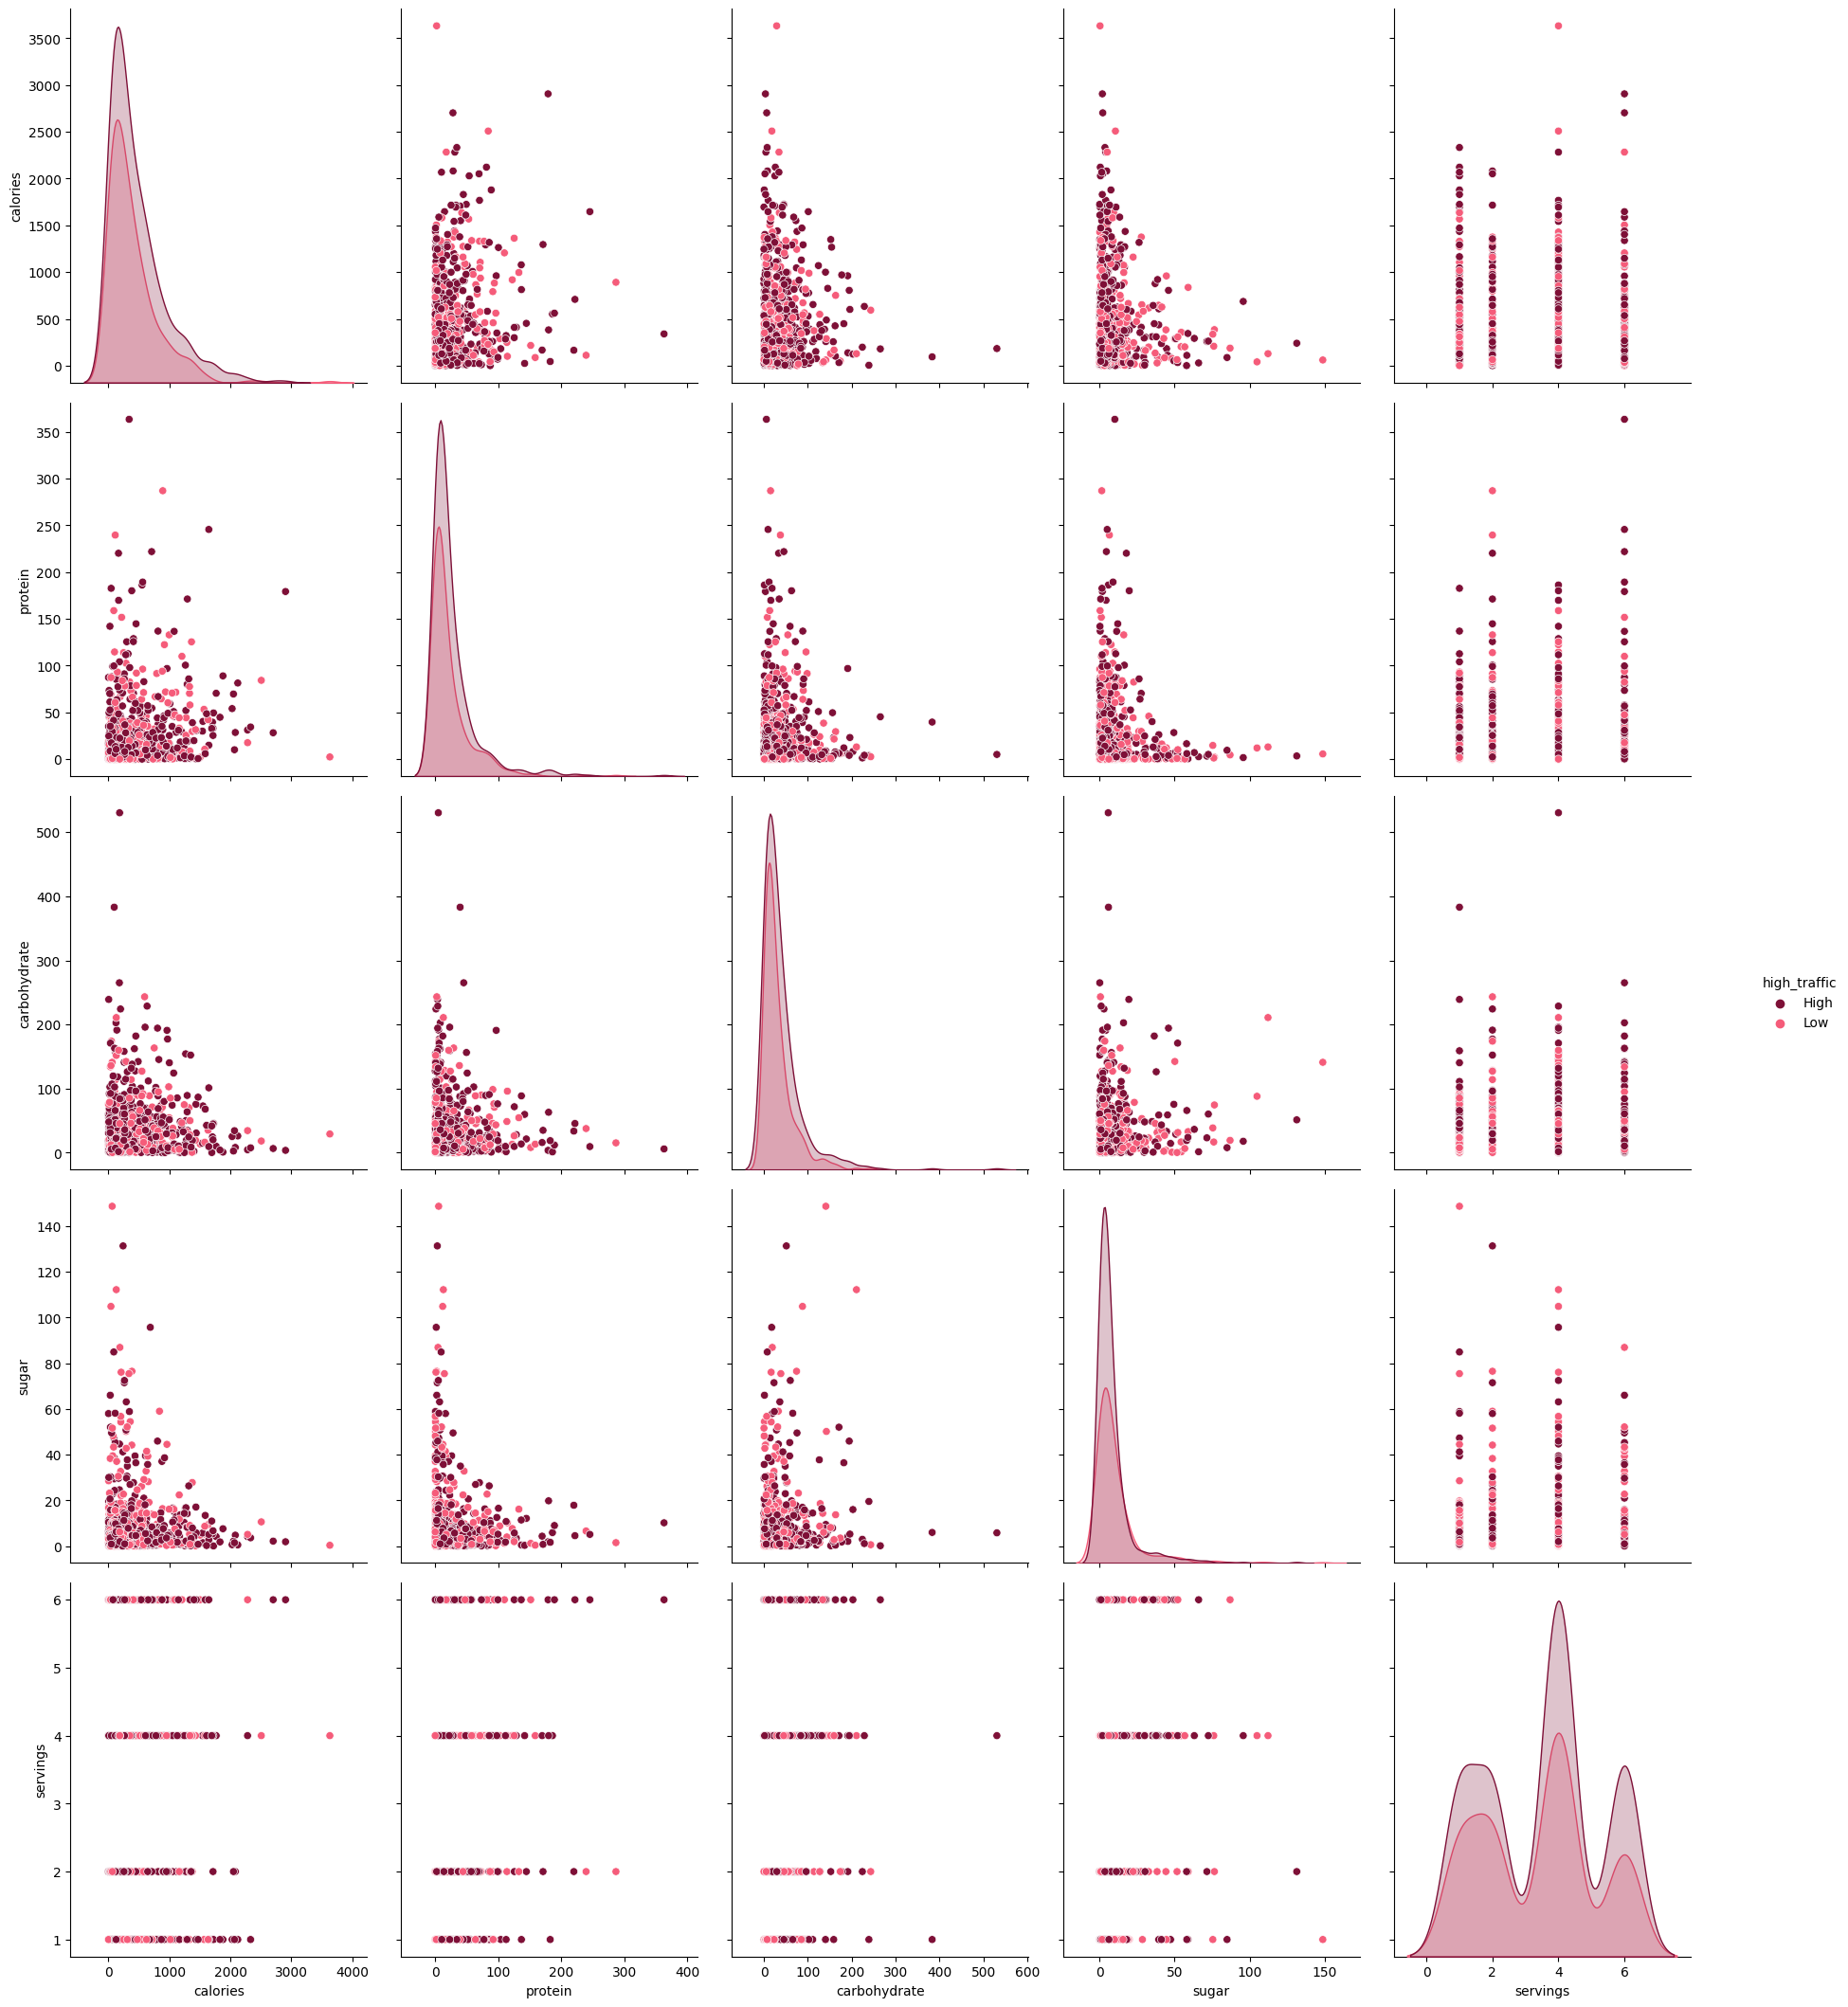

In [20]:
# fig = plt.figure(figsize=(20, 22), constrained_layout=True)
g = sns.pairplot(recipes[['calories', 'protein', 'carbohydrate', 'sugar', 'servings', 'high_traffic']],
                 hue='high_traffic', palette=palette2)
g.fig.set_size_inches(20, 22)
plt.show()


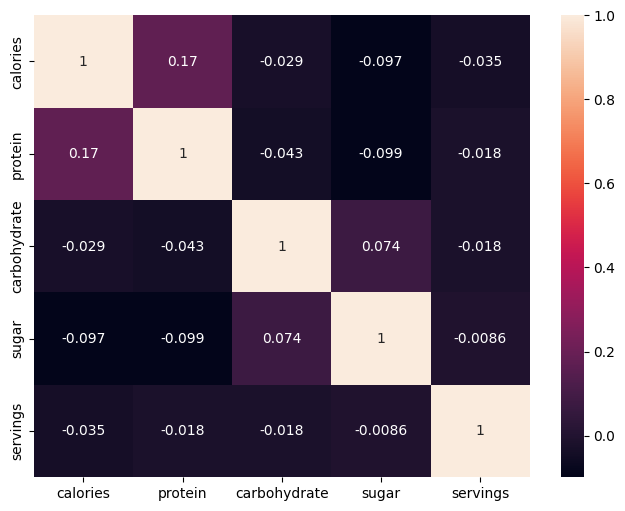

In [21]:
fig, ax = plt.subplots(figsize=(8,6))  
sns.heatmap(recipes[['calories', 'protein', 'carbohydrate', 'sugar', 'servings']].corr(), annot=True)
plt.show()

## 8.3 Feature-Target visual analysis
We will study the relationship between all the characteristics of the recipe and the high traffic generated on the site when a recipe is displayed.

### 8.3.1 Study of the relationship between the feature `category` and the target variable `high_traffic`

To visualize the relationship between `category` and `high_traffic` variables, we first checked the number of recipes in each category. Then we created a grouped bar chart that shows the proportion of recipes with high and low traffic for each category side-by-side. This allows us to see how the proportion of high traffic recipes varies across different categories. 

We observed that there are a total of **11** recipe categories, with the *Breakfast* category having the highest number of recipes (**11.84%**), followed by *Chicken Breast* (**10.50%**) and *Beverages* (**10.28%**). On the other hand, the *Chicken* and *One Dish Meal* categories had the fewest number of recipes (**less than 8%**).

Furthermore, conducting a thorough analysis of the `category` variable while considering the `high_traffic` target variable, we observed that the categories with the highest proportion of recipes with high traffic are *Vegetable*, *Potato*, *Pork*, *One Dish Meal*, *Meat*, *Lunch/Snacks*, and *Dessert*. On the other hand, the categories with the lowest proportion of recipes with high traffic are *Beverages*, *Breakfast*, and *Chicken*.


##### 8.3.1.1 Plot of how many recipes belong to each category:

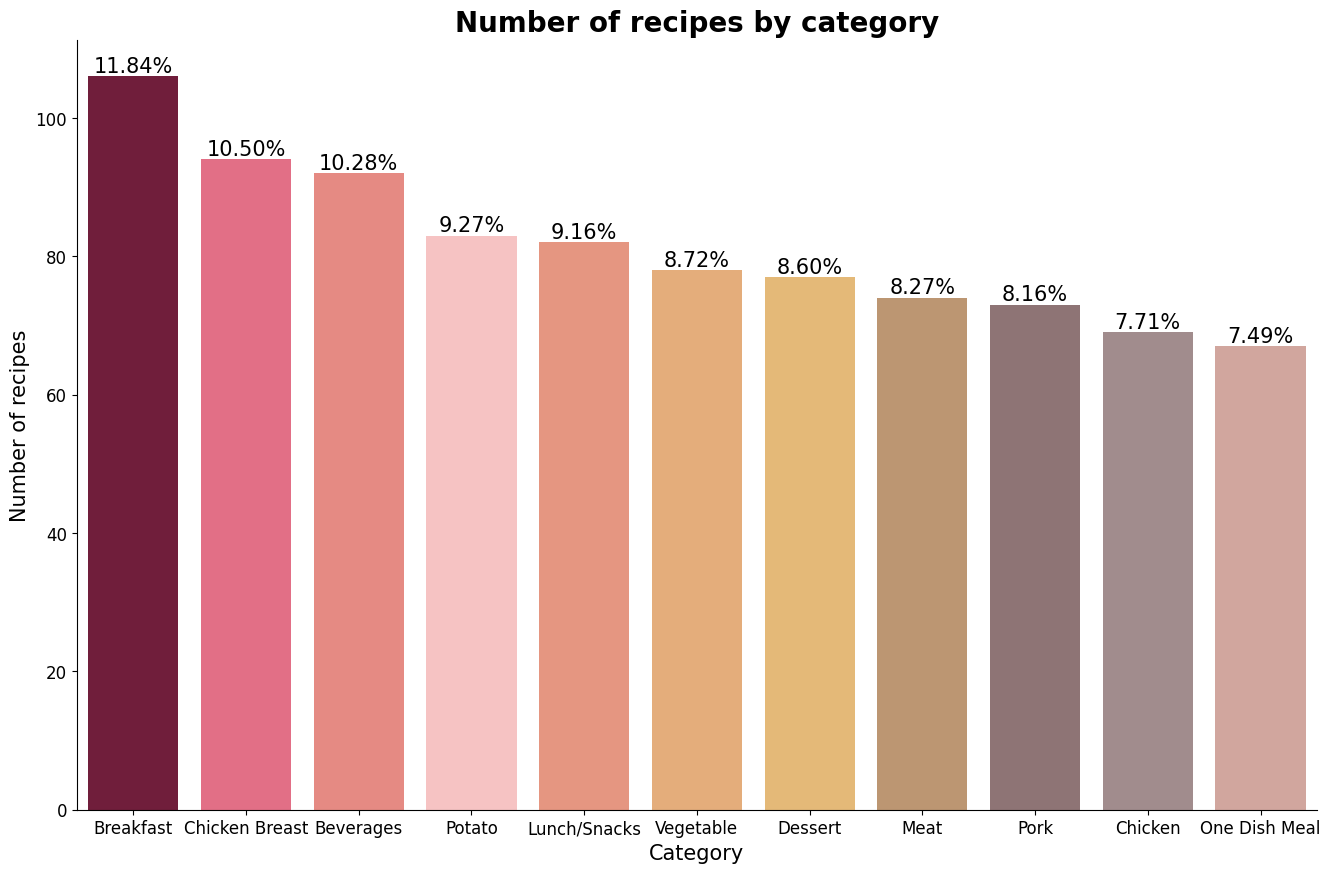

In [22]:
# visual representation of how many recipes belong to each category

# creating a new dataframe that summarizes the counts and proportions of recipes
# for each category
temp = recipes['category'].value_counts()
temp = pd.DataFrame(temp).reset_index()
temp.columns = ['category', 'num']
temp['prop'] = round(temp['num'] / recipes.shape[0] * 100, 2)

# plot the barplot
fig, ax = plt.subplots(figsize=(16, 10))
ax.tick_params(axis='both', labelsize=12)
sns.barplot(x='category', y='num', data=temp, order=temp['category'], palette=palette)

# set the percentages for each category on the graph
for p in ax.patches:
      x=p.get_bbox().get_points()[:,0]
      y=p.get_bbox().get_points()[1,1]
      ax.annotate('{:.2f}%'.format((p.get_height()/recipes.shape[0])*100), (x.mean(), y), 
                  ha='center',
                  va='bottom', 
                  fontsize=15)

# set the title and the labels for the axes
plt.title('Number of recipes by category',
          fontsize=20,
          fontweight='bold')
plt.xlabel('Category', 
           fontsize=15)
plt.ylabel('Number of recipes',
           fontsize=15)
sns.despine()
plt.show()

❗❗❗In the dataset description, it is mentioned that there are 10 recipe categories. However, upon analysis, we found 11 categories. We decided not to merge "Chicken" with "Chicken Breast" to maintain balanced categories as the combined category would have made up 18% of the total categories.

##### 8.3.1.2 Number of recipes by category and traffic:

In [23]:
# creating a pivot table that shows the number of recipes with high and low 
# traffic for each category

# number of recipes by category and high_traffic
recipes_subset = recipes[['category', 'high_traffic']]
counts = recipes_subset.groupby(['category', 'high_traffic']).size().reset_index(name='counts')

# pivot the data to create a separate column for each value of high_traffic
counts_pivot = counts.pivot(index='category', columns='high_traffic', values='counts')
counts_pivot = counts_pivot.reset_index()
counts_pivot

high_traffic,category,High,Low
0,Beverages,5,87
1,Breakfast,33,73
2,Chicken,25,44
3,Chicken Breast,44,50
4,Dessert,48,29
5,Lunch/Snacks,52,30
6,Meat,56,18
7,One Dish Meal,51,16
8,Pork,66,7
9,Potato,78,5


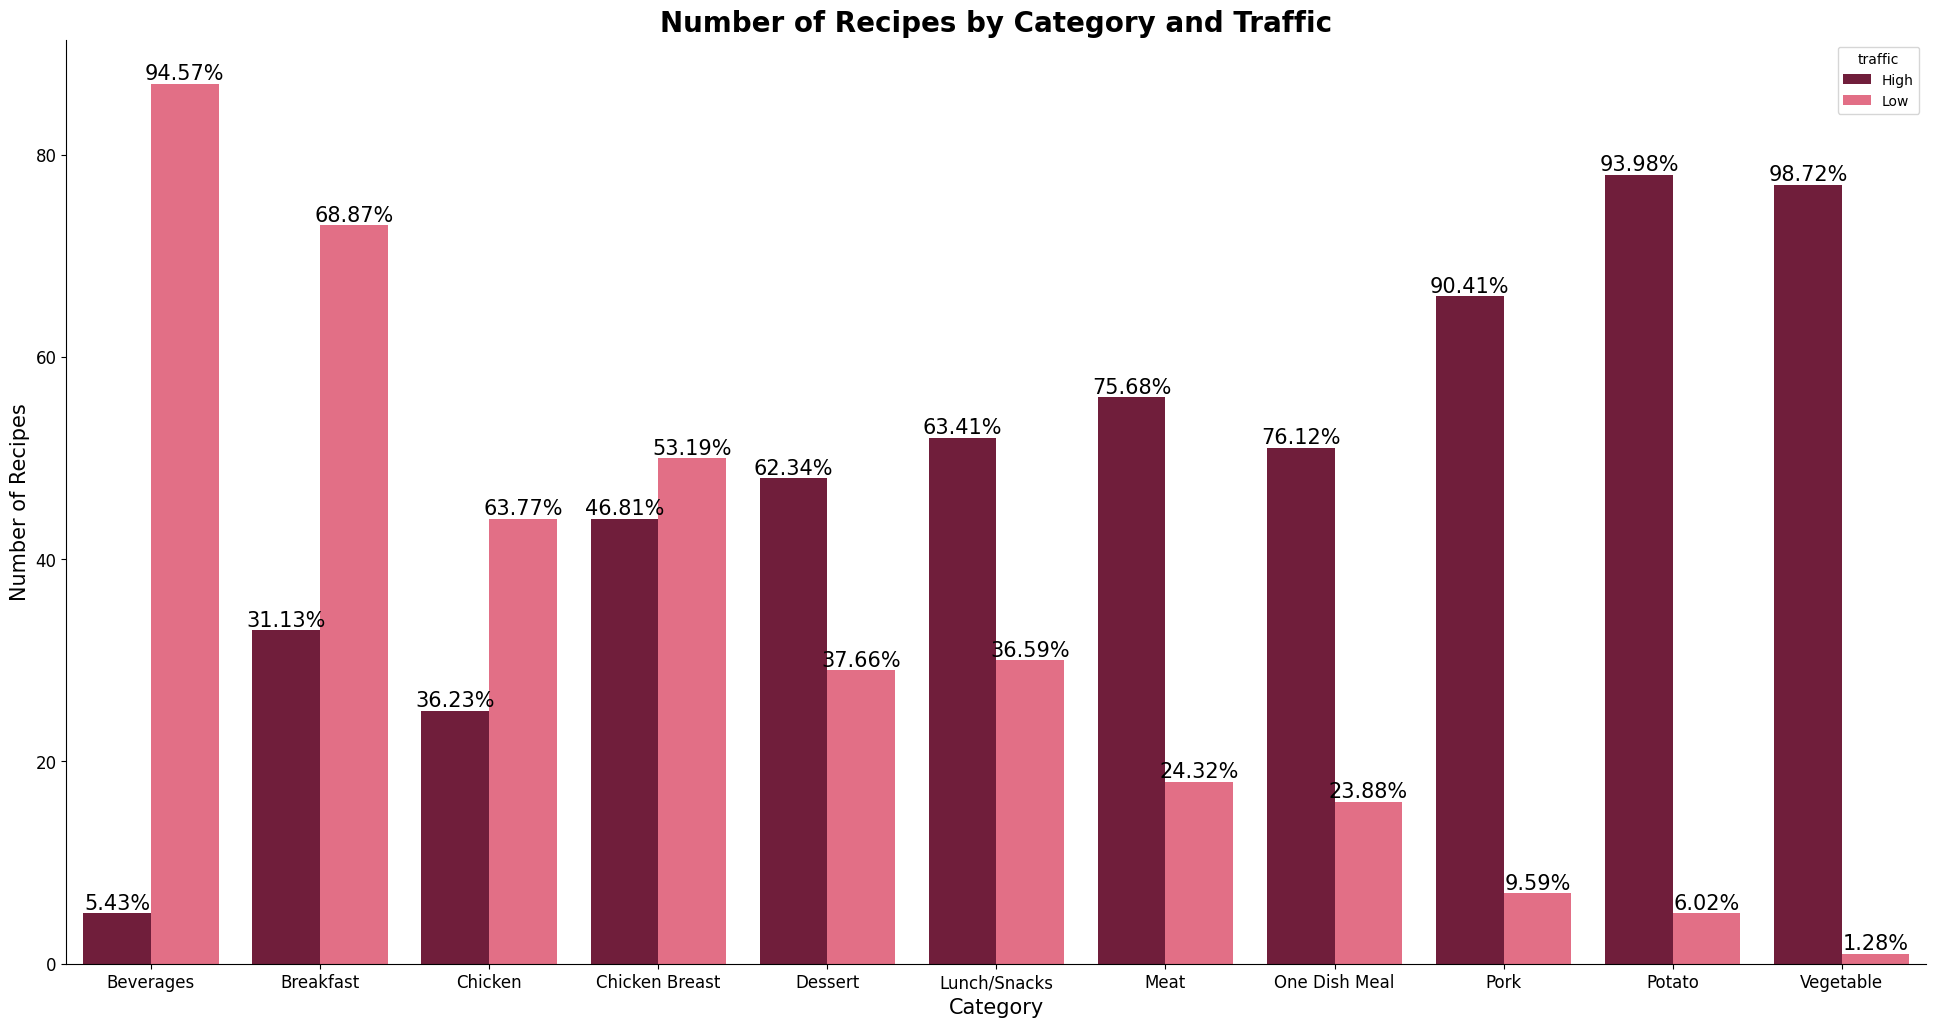

In [24]:
# creating a new datagrame by melting the counts_pivot dataframe and add a new
# column which is the total recipes for each category
df_melt = pd.melt(counts_pivot, id_vars='category', var_name='traffic', value_vars=['High', 'Low'])
df_melt['Total'] = df_melt.groupby('category')['value'].transform('sum').map('{:.0f}'.format)
df_melt['Total'] = df_melt['Total'].astype(int)

# df_melt

# plot the grouped bar chart side by side
fig, ax = plt.subplots(figsize=(24, 12))
ax.tick_params(axis='both', labelsize=12)
# create the barplot
sns.barplot(x='category', y='value', hue='traffic', data=df_melt, palette=palette)

# set the percentages for each bar from each category
for i, p in enumerate(ax.patches):
      x=p.get_bbox().get_points()[:,0]
      y=p.get_bbox().get_points()[1,1]
      height = p.get_height()
      ax.annotate('{:.2f}%'.format((p.get_height()/int(df_melt.iloc[i, 3]))*100), (x.mean(), y), 
                  ha='center',
                  va='bottom', 
                  fontsize=15)

# add titles and labels
plt.title('Number of Recipes by Category and Traffic', 
          fontsize=20,
          fontweight='bold')
plt.xlabel('Category', 
           fontsize=15)
plt.ylabel('Number of Recipes',
           fontsize=15)
sns.despine()
plt.show()

Based on the graph presented above, it can be observed that the categories with the highest proportion of recipes with high traffic are *Vegetable*, *Potato*, *Pork*, *One Dish Meal*, *Meat*, *Lunch/Snacks*, and *Dessert*. Conversely, the categories with the lowest proportion of recipes with high traffic are *Beverages*, *Breakfast*, and *Chicken*.

### 8.3.2 Study the distribution of features `calories`, `protein`, `sugar`, `carbohydrate` related to the target variable `high_traffic`

We created box plots of each of these features for each level of high_traffic variable in order to visually compare the distribution of the nutritional values for recipes with high traffic and recipes with low traffic.

To interpret the boxplots for each nutritional characteristic, we compared the medians and quartiles of the high traffic and low traffic groups visually. The medians and quartiles did not appear to differ significantly between the two groups, indicating that the distribution of protein, sugar, calories, and carbohydrate features may not be a significant factor in determining whether the recipe will have high traffic or not. We will perform some statistical tests in the next section to test our hypothesis.

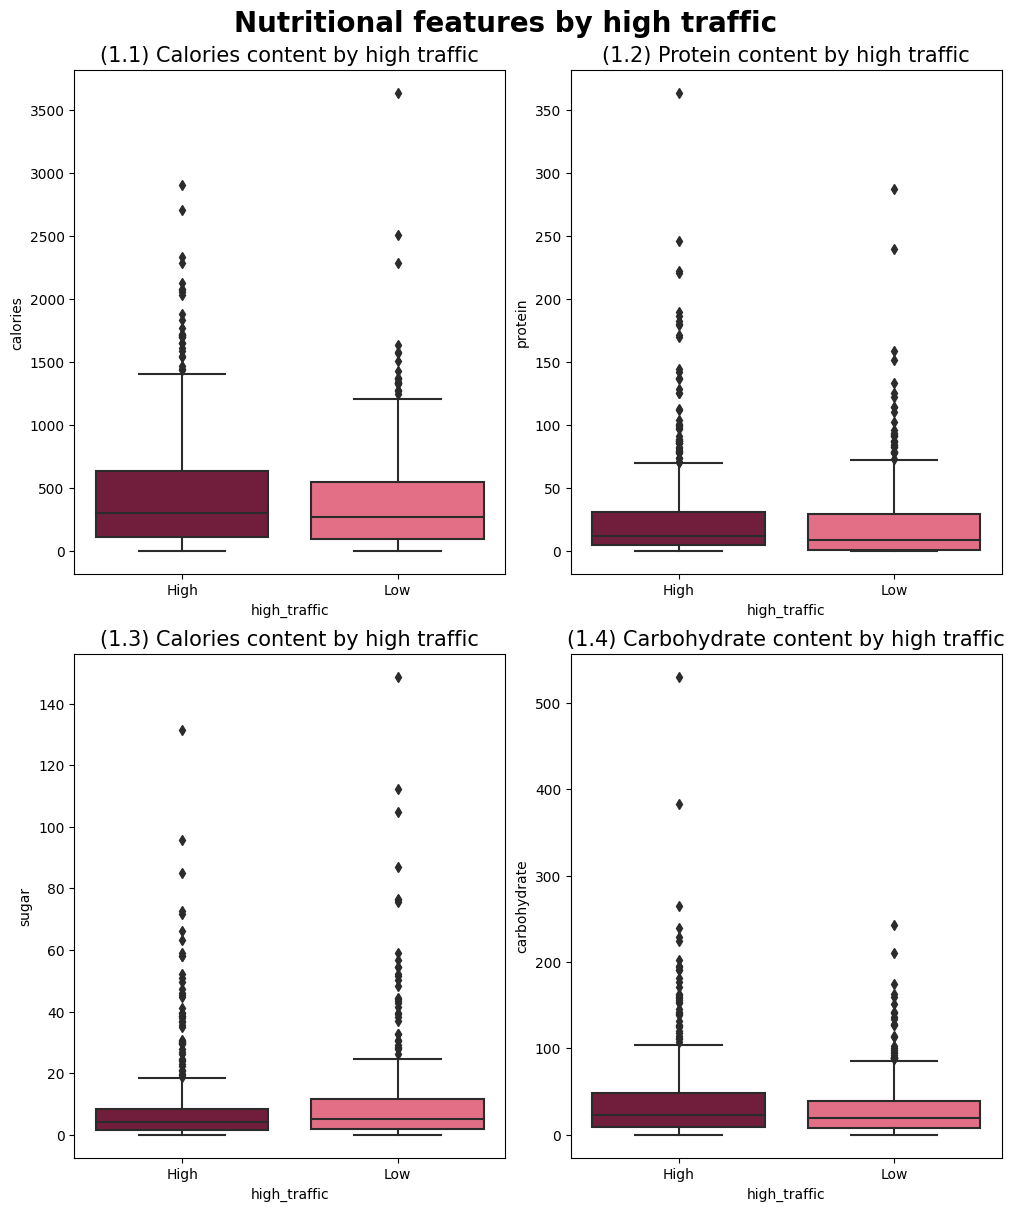

In [25]:
# plot the boxplots of the nutritional characteristics of the recipes for high
# traffic and low traffic

fig = plt.figure(figsize=(10, 12), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

# calories
ax00 = fig.add_subplot(spec[0, 0])
sns.boxplot(x='high_traffic', y='calories', data=recipes, palette=palette, ax=ax00)
ax00.set_title('(1.1) Calories content by high traffic', size=15)

ax01 = fig.add_subplot(spec[0, 1])
sns.boxplot(x='high_traffic', y='protein', data=recipes, palette=palette, ax=ax01)
ax01.set_title('(1.2) Protein content by high traffic', size=15)

# sugar
ax10 = fig.add_subplot(spec[1, 0])
sns.boxplot(x='high_traffic', y='sugar', data=recipes, palette=palette, ax=ax10)
ax10.set_title('(1.3) Calories content by high traffic', size=15)

ax11 = fig.add_subplot(spec[1, 1])
sns.boxplot(x='high_traffic', y='carbohydrate', data=recipes, palette=palette, ax=ax11)
ax11.set_title('(1.4) Carbohydrate content by high traffic', size=15)

# set the suptitle
_=fig.suptitle('Nutritional features by high traffic',
               fontsize=20,
               fontweight='bold')

plt.show()

### 8.3.3 Number of recipes by the number of `servings` and the target variable `high_traffic`

By visualizing the proportion of recipes with high and low traffic for each number of servings side-by-side using a grouped bar chart, we observed that 60% of recipes with 4 servings had high traffic and 40% had low traffic. Similarly, for 6 servings, almost 64% of the recipes had high traffic while the rest had low traffic.

In [26]:
# creating a pivot table that shows the number of recipes with high and low 
# traffic for each number of servings

# number of recipes by servings and high_traffic
recipes_subset = recipes[['servings', 'high_traffic']]
counts = recipes_subset.groupby(['servings', 'high_traffic']).size().reset_index(name='counts')

# pivot the data to create a separate column for each value of high_traffic
counts_pivot = counts.pivot(index='servings', columns='high_traffic', values='counts')
counts_pivot = counts_pivot.reset_index()
counts_pivot

high_traffic,servings,High,Low
0,1,99,70
1,2,98,76
2,4,220,147
3,6,118,67


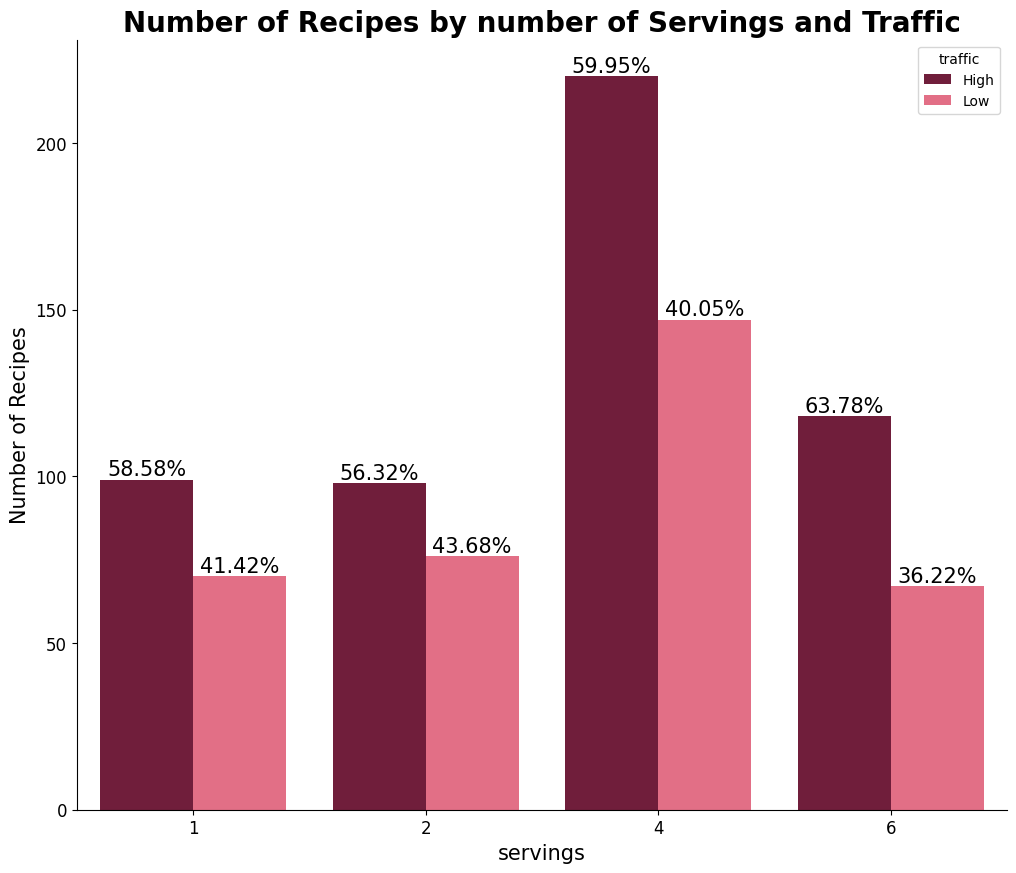

In [27]:
# creating a new dataframe by melting the counts_pivot dataframe and add a new
# column which is the total recipes for each number of servings
df_melt = pd.melt(counts_pivot, id_vars='servings', var_name='traffic', value_vars=['High', 'Low'])
df_melt['Total'] = df_melt.groupby('servings')['value'].transform('sum').map('{:.0f}'.format)
df_melt['Total'] = df_melt['Total'].astype(int)

# df_melt

# plot the grouped bar chart side by side
fig, ax = plt.subplots(figsize=(12, 10))
ax.tick_params(axis='both', labelsize=12)
# create the barplot
sns.barplot(x='servings', y='value', hue='traffic', data=df_melt, palette=palette)

# set the percentages for each bar from each servings
for i, p in enumerate(ax.patches):
      x=p.get_bbox().get_points()[:,0]
      y=p.get_bbox().get_points()[1,1]
      height = p.get_height()
      ax.annotate('{:.2f}%'.format((p.get_height()/int(df_melt.iloc[i, 3]))*100), (x.mean(), y), 
                  ha='center',
                  va='bottom', 
                  fontsize=15)

# add titles and labels
plt.title('Number of Recipes by number of Servings and Traffic', 
          fontsize=20,
          fontweight='bold')
plt.xlabel('servings', 
           fontsize=15)
plt.ylabel('Number of Recipes',
           fontsize=15)
sns.despine()
plt.show()

## **9.🧪 Statistical Significance Tests**
First, we will conduct statistical significance tests for the relationship between the `category` and `high_traffic` variables using **chi-squared test of independence**.

Second, for the continuous variables (`calories`,` protein`, `sugar`, and `carbohydrate`), we will **test for normality** using the **Shapiro test**. If the variables are **not** normally distributed, we will perform a **non-parametric test**, specifically the **Mann-Whitney U statistic**,to determine if there is a significant difference in the continuous variables between the high traffic and low traffic groups. In case of normal distribution, we will use **t-tests** for comparison.

In summary, the following tests will be applied:

- ` high_traffic` ~ `category`: **chi-squared test**
- `calories`, `protein`, `sugar`, and `carbohydrate` with **non-normal distribution** ~ `high_traffic`: **Mann-Whitney U test**
- `calories`,` protein`, `sugar`, and `carbohydrate` with **normal distribution** ~ `high_traffic`: **t-tests**.


Based on our analysis, we have observed that there exists a significant association between high traffic and the recipe category. Additionally, we have observed that the continuous variables - calories, protein, carbohydrate, and sugar - are not normally distributed. Further analysis revealed that, except for carbohydrate, there is evidence to suggest that there is a difference in the distribution of these variables for high and low traffic recipes.

### 9.1 Can we observe any association between the `category` and `high_traffic` variables?

We will use the chi-squared test of independence:

**Null hypothesis**: The `category` and `high_traffic` variables are independent.

**Alternative hypothesis**: The `category` and `high_traffic` variables are dependent.

In [28]:
# create a contingency table of category and high_traffic
contingency_table = pd.crosstab(recipes['category'], recipes['high_traffic'])

# calculate the chi-squared test statistic, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('p-value:', p_val)

if p_val < 0.05:
  print("There is evidence to suggest the presence of a relationship between the high_traffic and the category variables.")
else:
  print("We don't have enough evidence that there is a significant relationship between the high_traffic and the category variables.")

Chi-Squared Statistic: 305.59058102990576
Degrees of Freedom: 10
p-value: 1.022163781324079e-59
There is evidence to suggest the presence of a relationship between the high_traffic and the category variables.


### 9.2 Are the `calories`, `protein`, `sugar` and `carbohydrate` columns normally distributed?

We could see from the histograms that these variables are not normally distributed but to be sure, we will perform the **Shapiro-Wilk** test to see if the values of these variables are normally distributed.

**Null Hypothesis**: The data in each of these columns is normally distributed.

**Alternative Hypothesis**: The data in each of these columns is not normally distributed.


In [29]:
continuous_features =  ['calories', 'carbohydrate', 'sugar', 'protein']
results = {}

# apply the test for each of the continuous variable
for var in continuous_features:
  stat, p = shapiro(recipes[var])
  print(f'{var}: Test statistic = {stat:.5f}, p-value = {p}')
  results[var] = p

print('------------------------')

# print the results
for key, value in results.items():
  if value < 0.05:
    print(f'The data in the {key} variable is NOT normally distributed.')
  else:
     print(f'The data in the {key} variable is normally distributed.')

calories: Test statistic = 0.80629, p-value = 2.1325555201883356e-31
carbohydrate: Test statistic = 0.67680, p-value = 3.8268920159503525e-38
sugar: Test statistic = 0.55464, p-value = 1.018743983564142e-42
protein: Test statistic = 0.63638, p-value = 8.569724836486278e-40
------------------------
The data in the calories variable is NOT normally distributed.
The data in the carbohydrate variable is NOT normally distributed.
The data in the sugar variable is NOT normally distributed.
The data in the protein variable is NOT normally distributed.


### 9.5 Is there any significant difference in the distributions of the continuous variables `calories`, `protein`, `sugar` and `carbohydrate` between the high traffic and low traffic groups?
The variables for `calories`, `protein`, `sugar`, and `carbohydrates` do NOT have a normal distribution, and we will use the *Mann-Whitney U test* to determine whether there is a relationship between these variables and the target variable, `high_traffic`.

**Null Hypothesis**: There is no significant difference in the distribution of the continuous variable (calories, protein, sugar or carbohydrate) between the high traffic and the low traffic groups.

**Alternative Hypothesis**: There is significant difference in the distribution of the continuous variable (calories, protein, sugar or carbohydrate) between the high traffic and the low traffic groups.

In [30]:
num_vars = ['calories', 'protein', 'sugar', 'carbohydrate']

for col in num_vars:
    high_traffic = recipes[recipes['high_traffic'] == 'High'][col]
    low_traffic = recipes[recipes['high_traffic'] == 'Low'][col]
    
    stat, p_val = mannwhitneyu(high_traffic, low_traffic, alternative='two-sided')
    
    print(f'{col}: U-statistic={stat:.3f}, p-value={p_val:.3f}')
    if p_val < 0.05:
        print(f"There is significant difference in the distribution of the {col} variable between the high traffic and low traffic groups.")
    else:
        print(f"We don't have enough evidence that there is significant difference in the distribution the {col} variable between the high traffic and low traffic groups.")
    print("--------")

calories: U-statistic=104143.500, p-value=0.039
There is significant difference in the distribution of the calories variable between the high traffic and low traffic groups.
--------
protein: U-statistic=109837.500, p-value=0.000
There is significant difference in the distribution of the protein variable between the high traffic and low traffic groups.
--------
sugar: U-statistic=88245.000, p-value=0.034
There is significant difference in the distribution of the sugar variable between the high traffic and low traffic groups.
--------
carbohydrate: U-statistic=103655.000, p-value=0.052
We don't have enough evidence that there is significant difference in the distribution the carbohydrate variable between the high traffic and low traffic groups.
--------


## **10. 🔮 Recipe Site Traffic - a classification problem**

We are dealing with a classification problem in which we need to determine whether a recipe on the *Tasty Bytes* site produced high traffic or not based on the selected features.

Steps we followed:
1. The categorical variable `category` was encoding using one-hot technique, and, where necessary, all the input features were standardised by having a mean of 0 and standard deviation of 1.

2. We split the dataset intro training and testing sets (80:20 ratio), stratifying by the class proportions of the target variable.

3. We trained the two machine learning algorithms for this classification problem

4. We measured the models performances using the accuracy, recall and precision on the testing set.

5. The model performances were compared against each other and we draw some conclusions.

Why did we choose the Logistic Regression and Gradient Boosting classifiers?

Logistic Regression and Gradient Boosting are both popular machine learning algorithms for binary classification problems.
Logistic Regression is a simple and fast algorithm that is easy to interpret and can provide probabilities for each class. Gradient Boosting, on the other hand, is a more complex algorithm that can handle both linear and non-linear relationships between features and the outcome. It can handle missing data and outliers, and can also identify the most important features.
In this project, both algorithms were used to see if they can predict high-traffic recipes with high accuracy, and the best one was selected for the final model.

We first encoded the high_traffic variable by replacing "High" with 1 and "Low" with 0. We then prepared the data to be compatible with machine learning models by transforming the categorical variable "category" into numerical features using one-hot encoding. To accomplish this, we created two _ColumnTransformer_ objects: one for the _Gradient Boosting_ model and the other for the Logistic _Regression model_. We chose to use RobustScaler to scale the features because it is less sensitive to outliers. We then created a pipeline to define the sequence of data processing steps, which we fit and tested.

Comparing the two models, we found that **Logistic Regression outperformed Gradient Boosting on all three metrics used** (**accuracy - 70.39%**, **precision - 69.62%**, and **recall - 88.67%**). Notably, the two classifiers outperformed the base rate model, indicating that the added complexity of the more advanced models is justified. 

Next, we will perform feature importance analysis to determine the most important features that helped us to classify the recipes. We will then eliminate the least important features and create new models on the resulting data sets to assess their performance.

In [31]:
# encode the labels
recipes['high_traffic'] = np.where(recipes['high_traffic']=='High', 1, 0)
recipes.high_traffic.unique()

array([1, 0])

In [32]:
# remove the outliers columns
recipes = recipes.drop(outliers_cols, axis=1)

In [33]:
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1


In [34]:
def base_rate_model(X):
  '''
  Creates a baseline model that always predicts the majority class (The high traffic).
  '''
  y = np.ones(X.shape[0])
  return y

In [35]:
# split the data into features and target variable
X = recipes.drop(['high_traffic', 'recipe'], axis=1)
y = recipes['high_traffic']

In [36]:
# define the numerical and categorical features
numerical_features = ['calories', 'carbohydrate', 'sugar', 'protein']
categorical_features = ['category']

In [37]:
# define the preprocessor for numerical features using RobustScaler
num_transformer = RobustScaler()

# define the preprocessor for categorical features using OneHotEncoder
cat_transformer =  OneHotEncoder()

# combine the numerical and categorical transformers using ColumnTransformer for Logistic Regression
preprocessor_lr = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
],
  remainder='passthrough',
      verbose=False)

# combine the numerical and categorical transformers using ColumnTransformer for Gradient Boosting
preprocessor_gb = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features)
],
  remainder='passthrough',
      verbose=False)

In [38]:
# create pipelines for each models
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=42))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_gb),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [39]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# for Logistic Regression
# fit the Logistic Regression pipeline to the training data
logreg_pipeline.fit(X_train, y_train)

# predict the labels for the test data using logistic regression pipeline
y_pred = logreg_pipeline.predict(X_test)

# evaluate the accuracy, precision and recall of the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)

In [41]:
# for Gradient Boosting
# fit the gradient boosting pipeline to the training data
gb_pipeline.fit(X_train, y_train)

# predict the labels for the test data using gradient boosting pipeline
y_pred_gb = gb_pipeline.predict(X_test)

# evaluate the accuracy, precision and recall of the gradient boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

In [42]:
# for the Base Model
# assess the performance to the base model
y_pred_base = base_rate_model(X_test)

# evaluate the accuracy, precision and recall of the base model
accuracy_base = accuracy_score(y_test, y_pred_base)
precision_base = precision_score(y_test, y_pred_base)
recall_base = recall_score(y_test, y_pred_base)

In [43]:
# display results
results = {
    'Classifier': ['Logistic Regression', 'Gradient Boosting', 'Base Rate'],
    'Accuracy': [accuracy_lr, accuracy_gb, accuracy_base],
    'Precision': [precision_lr, precision_gb, precision_base],
    'Recall': [recall_lr, recall_gb, recall_base]
}

results_df = pd.DataFrame(results)

results_df

,Classifier,Accuracy,Precision,Recall
0,Logistic Regression,0.703911,0.696296,0.886792
1,Gradient Boosting,0.687151,0.695312,0.839623
2,Base Rate,0.592179,0.592179,1.000000


## **11.📔 Feature importances**

The coefficients of logistic regression represent the effect of each feature on the probability of a recipe to be popular or not. 
A positive coefficient means that an increase in the corresponding feature value will increase the probability of a recipe being popular, while a negative coefficient means that an increase in the corresponding feature value will decrease the probability of a recipe being popular.

Interpreting the coefficients we gained the following insights:

- category "Vegetable" has a coefficient of 2.4848, which means that if we display a vegetable recipe, it is almost two and a half times more likely to be popular compared to a recipe that is not categorized as a vegetable;
- recipes from categories like "Potato" and "Pork" are also more likely to be accessed by an increased number of users;
- category "Beverages" has a coefficient of -2.96, which means that if a recipe is categorized as a beverage, it is less likely to be popular compared to a recipe that is not categorized as a beverage;
- recipes from categories like "Breakfast" and "Chiken" are also more likely to be unpopular because their coefficient is negative and their magnitude is high;
- among the numerical features, the coefficient of "carbohydrate" is positive (0.111), which means that an increase in the amount of carbohydrates in a recipe will increase the probability of the recipe being popular. The coefficients of "protein" and "calories" are relatively small (0.023 and -0.013 respectively), indicating a weaker association with popularity, The coefficient of "sugar" is negative (-0.057), indicating that recipes with little amount of sugar are more likely to be popular.

These findings confirm the hypothesis we formed during the exploratory data analysis and after performing the statistical tests.

In [44]:
# Get the feature names after pre-processing
feature_names = preprocessor_lr.get_feature_names_out()

# Get the logistic regression coefficients
logreg_coef = logreg_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame with feature names and coefficients
feature_coef = pd.DataFrame({'feature': feature_names, 'coefficient': logreg_coef})

# Print the feature coefficients in descending order
print(feature_coef.sort_values(by='coefficient', ascending=False))


                         feature  coefficient
14       cat__category_Vegetable     2.484866
13          cat__category_Potato     1.563945
12            cat__category_Pork     1.226486
10            cat__category_Meat     0.436587
11   cat__category_One Dish Meal     0.433880
1              num__carbohydrate     0.111526
3                   num__protein     0.023727
15           remainder__servings    -0.000378
0                  num__calories    -0.013380
8          cat__category_Dessert    -0.036293
2                     num__sugar    -0.057056
9     cat__category_Lunch/Snacks    -0.083927
7   cat__category_Chicken Breast    -0.476055
6          cat__category_Chicken    -1.047823
5        cat__category_Breakfast    -1.537132
4        cat__category_Beverages    -2.960804


## 11. 🔁 Rebuild the models:
In the previous step, we have identified features with coefficients that are almost zero, namely servings, protein, calories, and the dessert category. Since these features are considered to be of the least importance, we will rebuild the models without them and compare their performance metrics.

After removing the features with the least importance, we observed a noticeable improvement in the performance metrics of our models. Specifically, the accuracy of the **Logistic Regression model** increased by 13%, resulting in an overall accuracy of almost **83%**. The recall and precision were also above 80%. For the **Gradient Boosting classifier**, the accuracy improved by 9%, achieving an accuracy of **77.5%**. In the next step, we will focus on tuning the hyperparameters of the Gradient Boosting classifier to further enhance the performance metrics.

In [45]:
# remove the variables with the least importance
columns_to_drop = ['high_traffic', 'recipe', 'servings', 'protein', 'calories']
recipes2 = recipes[~recipes['category'].isin(['Dessert', 'Lunch/Snacks', 'Chicken Breast'])]

# split the data into features (X) and target variable (y)
X = recipes2.drop(['high_traffic', 'recipe'], axis=1)
y = recipes2['high_traffic']

# define the numerical and categorical features
numerical_features = ['carbohydrate', 'sugar']
categorical_features = ['category']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# for Logistic Regression
# fit the logistic regression pipeline to the training data
logreg_pipeline.fit(X_train, y_train)

# predict the labels for the test data using logistic regression pipeline
y_pred = logreg_pipeline.predict(X_test)

# evaluate the accuracy, precision and recall of the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)


# for Gradient Boosting
# fit the gradient boosting pipeline to the training data
gb_pipeline.fit(X_train, y_train)

# predict the labels for the test data using gradient boosting pipeline
y_pred_gb = gb_pipeline.predict(X_test)

# evaluate the accuracy, precision and recall of the gradient boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

# display results
results = {
    'Classifier': ['Logistic Regression', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_gb],
    'Precision': [precision_lr, precision_gb],
    'Recall': [recall_lr, recall_gb]
}

results_df = pd.DataFrame(results)

results_df

,Classifier,Accuracy,Precision,Recall
0,Logistic Regression,0.829457,0.863014,0.840000
1,Gradient Boosting,0.775194,0.780488,0.853333


## **12. ⏫ Tuning the hyperparameters**
In this step, we performed a hyperparameter tuning for the Gradient Boosting classifier. The tuning process involved using a 5-fold stratified cross-validation. 

The **best hyperparameters** for the **Gradient Boosting classifier** are a **learning rate of 0.1**, a **maximum depth of 1**, and **300 estimators**. The best **accuracy** obtained with these hyperparameters **81.67%**, the best **precision** obtained is **80.49%** and the best **recall** is **88%**. 

Overall, these results suggest that the tuned Gradient Boosting classifier is a good model for predicting popular recipes with high accuracy, precision, and recall.

In [46]:
# define the candidate parameters for the classifier
gb_hyperparams = {'classifier__n_estimators':[int(x) for x in range(100, 800, 200)],
                    'classifier__learning_rate': [0.001, 0.01, 0.1, 1],
                    'classifier__max_depth': [1, 3, 5]}

# initialise a 5-fold stratified cross-validator
stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [47]:
# perform GridSearchCV to find the best hyperparameters
gb_search = GridSearchCV(estimator=gb_pipeline,
                         param_grid=gb_hyperparams,
                         scoring='accuracy',
                         cv=stratified_kfold,
                         refit=True,
                         verbose=False,
                         return_train_score=True,
                         n_jobs=-1)
gb_search.fit(X_train, y_train)

# print the results
print('Best hyperparameters:', gb_search.best_params_)
print('Best accuracy:', gb_search.best_score_)
print('Best precision:', precision_score(y_test, gb_search.predict(X_test)))
print('Best recall:', recall_score(y_test, gb_search.predict(X_test)))


Best hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 1, 'classifier__n_estimators': 300}
Best accuracy: 0.8167330374513619
Best precision: 0.8048780487804879
Best recall: 0.88


## 📐 Business Metrics
A possible business metric that aligns with the goal of increasing website traffic is the proportion of recipes that generate high traffic. According to the data provided by Tasty Bytes, out of 895 recipes, **60% are considered high-traffic**. However, the available data is insufficient to develop a relevant business metric. Additionally, the data provided by Tasty Bytes does not include any information on how they measure website traffic. I will provide further details and recommendations in the next section.

## 🖊️ Summary of our analysis

The _Tasty Bytes_ dataset we received contains information about **947 recipes**, including calories, carbohydrates, protein, sugar, category, and number of servings. Additionally, we know which recipes generated high and low traffic on the website. After cleaning and validating the data, we were left with **895 recipes**, of which **60% were high-traffic** and **40% were low-traffic**.

During the Exploratory Data Analysis, we discovered that certain recipe categories had higher or lower traffic. For example, categories like _Vegetable_, _Potato_, and _Pork_ were more likely to have high traffic recipes, while _Beverages_, _Breakfast_, and _Chicken_ recipes were less likely to be popular. We confirmed these findings with statistical tests and also discovered that continuous variables like calories, protein, sugar, and carbohydrate were not normally distributed and required scaling.
Bellow we can see the distribution of recipes by the category and high traffic:
![recipes by category and high traffic](recipes%20by%20category%20and%20high%20traffic.jpeg)

Since we needed to classify recipes as high-traffic or not, we used **Logistic Regression** and **Gradient Boosting** Classifier models, as well as a **base model** that predicted the majority class (in our case, high-traffic recipes). After using all the features, we found that both models outperformed the base model but didn't reach the desired accuracy of 80%. To improve accuracy, we performed feature selection that confirmed our earlier findings about the importance of certain recipe categories (_Vegetable_, _Potato_ and _Pork_) and the **relatively weaker association of protein, calories, and sugar with popularity**.

We then rebuilt the models using only the most impactful features (we eliminated servings, protein, calories, Desert, Lunch/Snacks and Chicken Breast categories), resulting in a **Logistic Regression Classifier** **accuracy** of nearly **83%** and a **Gradient Boosting Classifier** **accuracy** of **77.5%**. By **tuning the hyperparameters for the Gradient Boosting Classifier**, we achieved an accuracy of **81.67%** with a learning rate of 0.1, maximum depth of 1, and 300 estimators.

## 🏹 Recommendations

- To increase the website traffic, we recommend that Tasty Bytes display more recipes from categories such as Vegetable, Potato, and Pork while reducing the number of Beverages and Breakfast recipes.
- The available data on recipe information is not sufficient for a comprehensive analysis, and we suggest including other important factors such as recipe ingredients, preparation time, instructions, and overall appeal of the recipe on the site. 
- Unfortunately, there was no clear information on how the high traffic on the site is measured. Although it was noted that displaying popular recipes increases website traffic by up to 40%, it's unclear if it is measured by the number of users who click on the recipe or view the recipe or is measured by other user interactions such as saving or liking the recipe. Therefore, we propose two possible business metrics:
    - Click-through rate (CTR) for each recipe, which measures the percentage of users who view a recipe and click on it
    - Conversion rate (CR) of high-traffic recipe views to actual recipe engagement, which measures the percentage of users who view high-traffic recipes and then interact with them in some way, such as saving or liking them.

We hope that our analysis provides a good starting point for a more in-depth study and that our recommendations can help Tasty Bytes increase its website traffic.

Made by @Alexandra Grecu

February 2023